In [1]:
import sys
import os
top_path = os.path.abspath("../")
if top_path not in sys.path:
    sys.path.insert(0, top_path)

import astropy.units as u
from astropy.io import fits
import h5py
import matplotlib.pyplot as plt
plt.style.use('apw-notebook')
%matplotlib inline
import numpy as np
    
from gwb.data import TGASData

In [2]:
tgas = TGASData('../data/stacked_tgas.fits')
tgas = tgas[tgas.parallax_snr > 8]

In [3]:
pair_idx = fits.getdata('../data/snr8_n32_dv4.fits', 0)

In [4]:
with h5py.File("../data/snr8_n32_dv4-likelihood-ratio.h5") as f:
    ratio = f['lnH1'][:] - f['lnH2'][:]

In [5]:
tgas1 = tgas[pair_idx[:,0]]
tgas2 = tgas[pair_idx[:,1]]

In [6]:
len(ratio), len(tgas1), len(tgas2)

(138589, 138589, 138589)

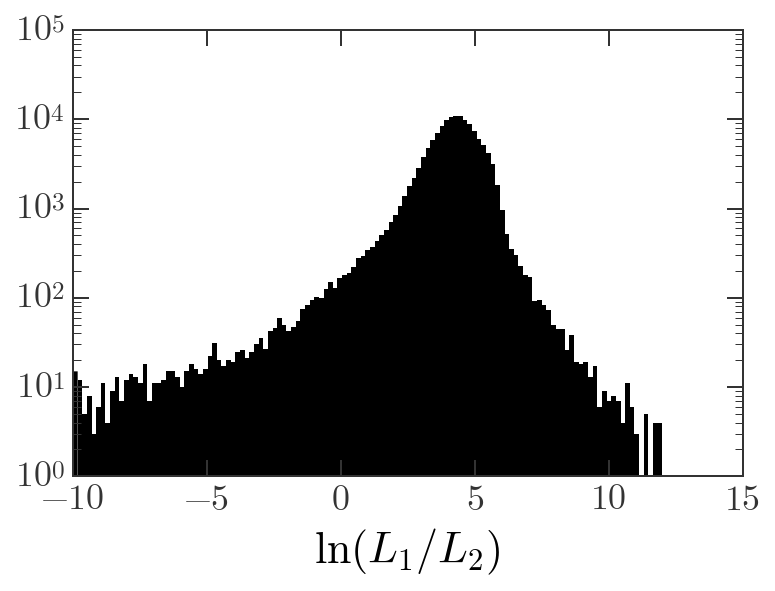

In [7]:
plt.hist(ratio, bins=np.linspace(-10,12,128), color='k');
plt.yscale('log')
plt.xlabel(r'$\ln (L_1/L_2)$')

In [8]:
dvtan = np.sqrt(np.sum((tgas1.get_vtan() - tgas2.get_vtan())**2, axis=1))
dvtan.shape

(138589,)

In [9]:
c1 = tgas1.get_coord()
c2 = tgas2.get_coord()
sep = c1.separation_3d(c2)

In [10]:
cut = ratio < 6

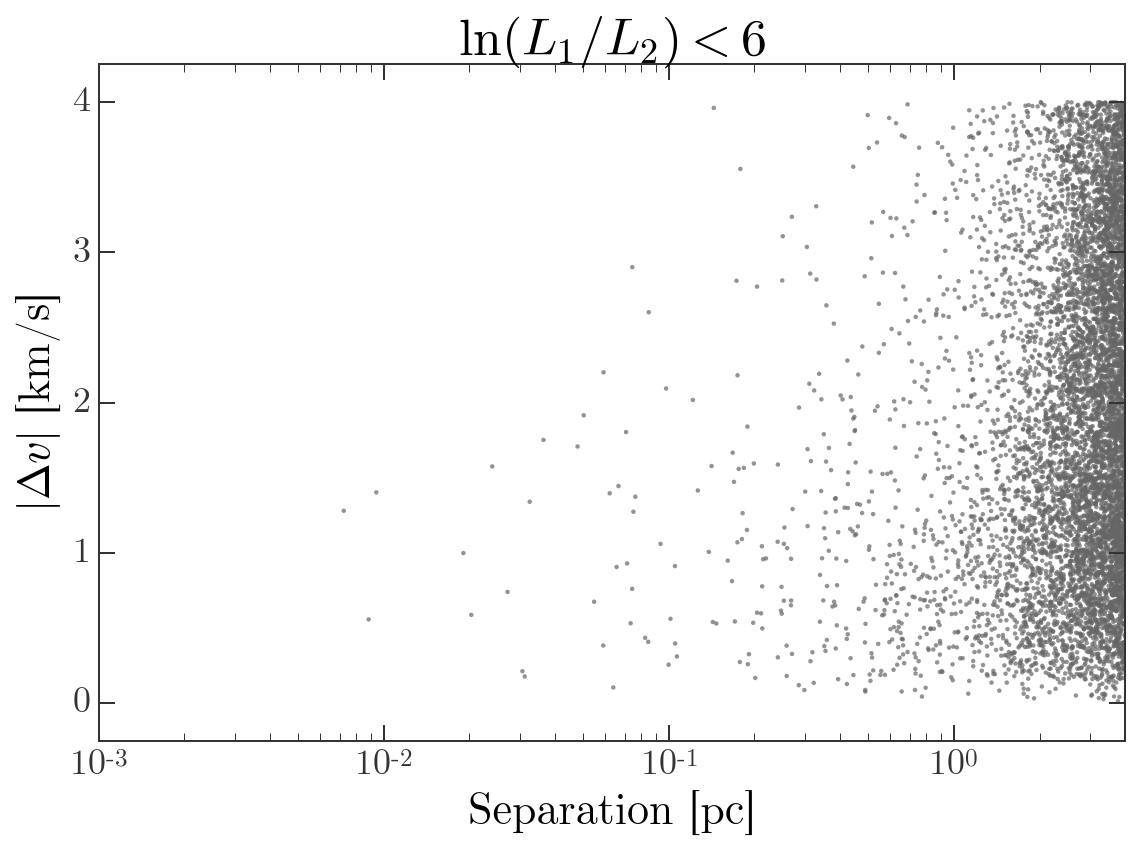

In [11]:
plt.figure(figsize=(8,6))

plt.scatter(sep.to(u.pc).value[cut], dvtan.to(u.km/u.s).value[cut], 
            alpha=0.7, marker='.', c='#666666')

plt.xscale('log')
plt.xlim(1E-3, 4)
plt.ylim(-0.25, 4.25)
plt.xlabel('Separation [pc]')
plt.ylabel(r'$|\Delta v|$ [km/s]')
plt.title(r'$\ln (L_1/L_2) < 6$')
plt.tight_layout()

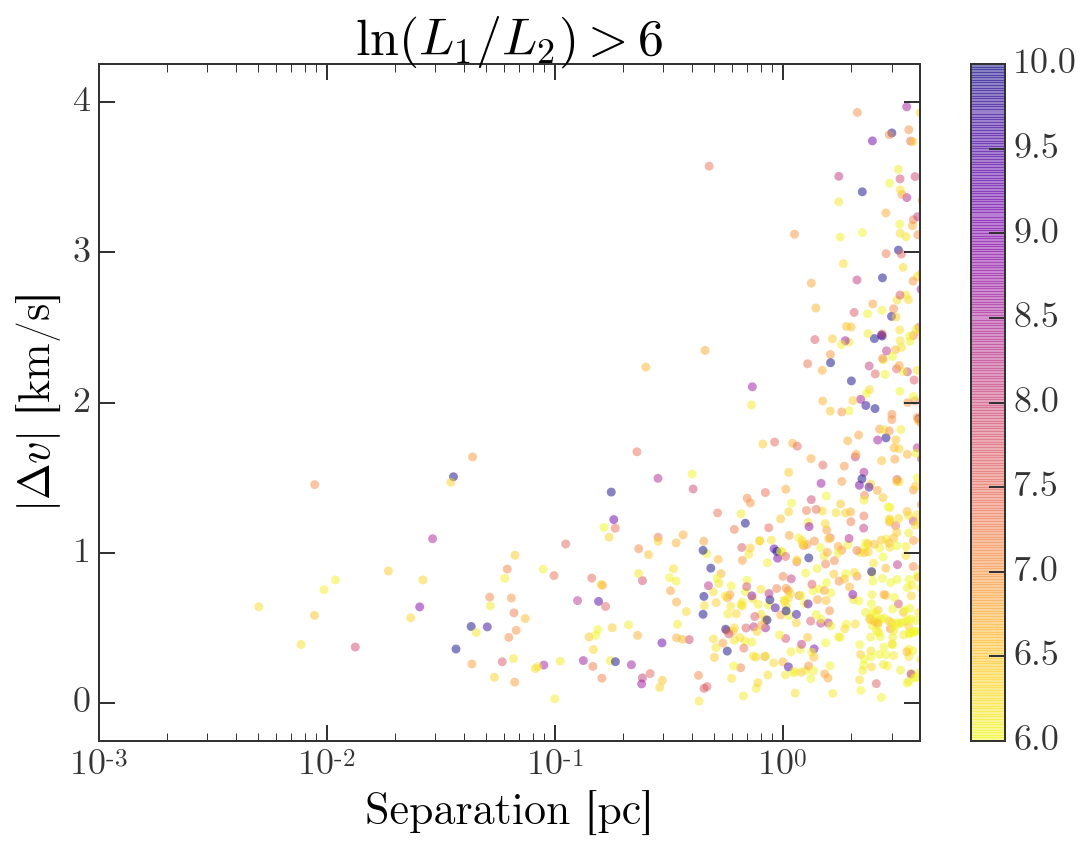

In [12]:
plt.figure(figsize=(8,6))

plt.scatter(sep.to(u.pc).value[~cut], dvtan.to(u.km/u.s).value[~cut], alpha=0.5,
            marker='o', c=ratio[~cut], vmin=6, vmax=10, cmap='plasma_r')

plt.xscale('log')
plt.xlim(1E-3, 4)
plt.ylim(-0.25, 4.25)
plt.xlabel('Separation [pc]')
plt.ylabel(r'$|\Delta v|$ [km/s]')
plt.title(r'$\ln (L_1/L_2) > 6$')
plt.colorbar()
plt.tight_layout()